<a href="https://colab.research.google.com/github/wesleybeckner/technology_fundamentals/blob/main/C4%20Machine%20Learning%20II/SOLUTIONS/SOLUTION_Tech_Fun_C4_L1_NN_Linearity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Technology Fundamentals Course 4, Lab 1: Practice with FFNNs

**Instructor**: Wesley Beckner

**Contact**: wesleybeckner@gmail.com

**Teaching Assitants**: Varsha Bang, Harsha Vardhan

**Contact**: vbang@uw.edu, harshav@uw.edu

<br>

---

<br>

In this lab we will compare the FFNN to the classification algorithms we created in Course 2.

<br>

---




# Data and Helper Functions

In [3]:
import plotly.express as px
from sklearn.datasets import make_blobs, make_moons
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

X, y = make_blobs(random_state=42, centers=2, cluster_std=3)
X, y = make_moons(random_state=42, noise=0.05, n_samples=1000)
px.scatter(x=X[:,0],y=X[:,1],color=y.astype(str))

In [4]:
def plot_boundaries(X, clf, ax=False):
  plot_step = 0.02
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
  
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  
  if ax:
    cs = ax.contourf(xx, yy, Z, cmap='viridis', alpha=0.2)
    ax.scatter(X[:,0], X[:,1], c=y, cmap='viridis', edgecolor='grey', alpha=0.9)
    return ax
  else:
    cs = plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.2)
    plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', edgecolor='grey', alpha=0.9)
  

# L1 Q1: 

Build and train a linear classification model using keras tf. Verify that the model is linear by either showing the weights or plotting the decision boundary (hint: you can use `plot_boundaries` above).

In [37]:
# Code Cell for L1 Q1
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    #### YOUR CODE HERE ###
    layers.Dense(100),
    layers.Dense(100),
    layers.Dense(100),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

history = model.fit(X,y,
          batch_size=100,
          epochs=500,
          verbose=0)

model.summary()

results = pd.DataFrame(history.history)
display(results.tail())

y_pred = model.predict(X) > 0.5
px.scatter(x=X[:,0],y=X[:,1], color=y_pred.astype(str))

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (100, 100)                300       
_________________________________________________________________
dense_57 (Dense)             (100, 100)                10100     
_________________________________________________________________
dense_58 (Dense)             (100, 100)                10100     
_________________________________________________________________
dense_59 (Dense)             (100, 1)                  101       
Total params: 20,601
Trainable params: 20,601
Non-trainable params: 0
_________________________________________________________________


,loss,binary_accuracy
495,0.226854,0.892
496,0.226208,0.887
497,0.226092,0.889
498,0.226996,0.887
499,0.226448,0.887


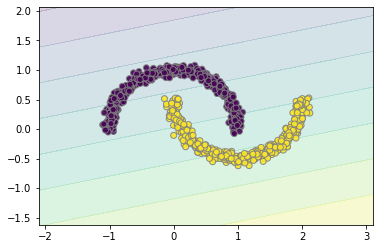

In [38]:
plot_boundaries(X, model)

# L1 Q2:

Now add an activation function to your previous model. Does the model become non-linear?


In [12]:
# Code Cell for L1 Q2

model = keras.Sequential([
    #### YOUR CODE HERE ###
    layers.Dense(2, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

history = model.fit(X,y,
          batch_size=100,
          epochs=500,
          verbose=0)

results = pd.DataFrame(history.history)

display(results.tail())

y_pred = model.predict(X) > 0.5
px.scatter(x=X[:,0],y=X[:,1],color=y_pred.astype(str))

,loss,binary_accuracy
495,0.238298,0.884
496,0.238223,0.885
497,0.238204,0.885
498,0.238182,0.885
499,0.238169,0.885


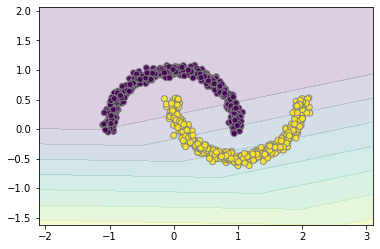

In [13]:
plot_boundaries(X, model)

# L1 Q3:

Continue to add complexity to your Q3 model until  you get an accuracy above 99%

In [39]:
# Code Cell for L1 Q3

model = keras.Sequential([
    #### YOUR CODE HERE ###
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

history = model.fit(X,y,
          batch_size=100,
          epochs=400,
          verbose=0)

results = pd.DataFrame(history.history)

display(results.tail())

y_pred = model.predict(X) > 0.5
px.scatter(x=X[:,0],y=X[:,1],color=y_pred.astype(str))

,loss,binary_accuracy
395,5.649688e-07,1.0
396,5.605606e-07,1.0
397,5.566859e-07,1.0
398,5.525151e-07,1.0
399,5.487116e-07,1.0


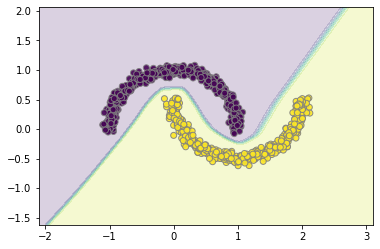

In [40]:
plot_boundaries(X, model)